# %% [markdown]
# # Preprocessing and EDA - PM2.5 Forecasting
# 
# **Notebook 1**: Data loading, cleaning, and exploratory data analysis

In [4]:
# ## 1. Import Libraries
import sys
sys.path.append(r"D:/Study/Mining/lab4/du-lieu-lon-khai-pha-du-lieu")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.classification_library import DataLoader, EDAVisualizer

# Thiết lập style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [5]:
# ## 2. Load Data from ZIP
# ### 2.1 Configure parameters
# Thay đổi các tham số tại đây
USE_ZIP = True
ZIP_PATH = '../data/raw/PRSA2017_Data_20130301-20170228.zip'
LAG_HOURS = [1, 3, 24]  # Độ trễ để tạo features

In [6]:
# ### 2.2 Load data
print("Loading data from zip...")
loader = DataLoader()

if USE_ZIP:
    raw_df = loader.load_from_zip(ZIP_PATH)
else:
    # Alternative: load from processed file if exists
    raw_df = pd.read_parquet('../data/processed/cleaned.parquet')

print(f"Raw data shape: {raw_df.shape}")
print(f"Columns: {raw_df.columns.tolist()}")

Loading data from zip...
Found 12 CSV files in zip
Combined shape: (420768, 18)
Raw data shape: (420768, 18)
Columns: ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']


In [7]:
# ### 2.3 Quick look at the data
print("\nFirst few rows:")
print(raw_df.head())

print("\nData types:")
print(raw_df.dtypes)

print("\nBasic statistics:")
print(raw_df.describe())


First few rows:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  

Data types:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP

In [8]:
# ## 3. Data Cleaning
# %% [markdown]
# ### 3.1 Clean the data
print("Cleaning data...")
cleaned_df = loader.clean_data(raw_df)

Cleaning data...
Data cleaning completed


In [9]:
# ### 3.2 Add time features
print("Adding time features...")
cleaned_df = loader.add_time_features(cleaned_df)

Adding time features...
Time features added


In [12]:
# ### 3.3 Add lag features
print(f"Adding lag features: {LAG_HOURS}")
cleaned_df.columns = cleaned_df.columns.str.lower()


Adding lag features: [1, 3, 24]


In [13]:
# ### 3.4 Save cleaned data
output_path = '../data/processed/cleaned.parquet'
cleaned_df.to_parquet(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: ../data/processed/cleaned.parquet


Missing data analysis:

Columns with missing values:
- co: 4.92%
- o3: 3.16%
- no2: 2.88%
- so2: 2.14%
- pm2.5: 2.08%
- pm10: 1.53%
- wd: 0.43%
- dewp: 0.10%
- temp: 0.09%
- pres: 0.09%
- rain: 0.09%
- wspm: 0.08%


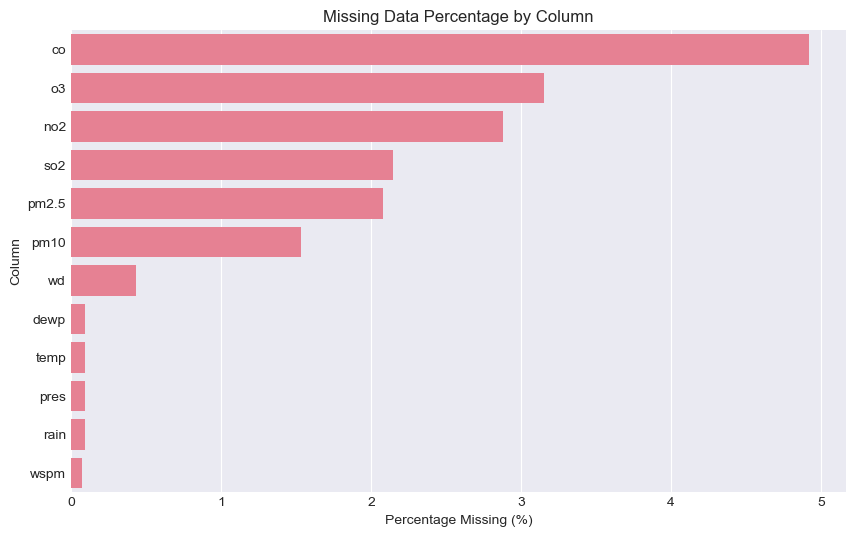

In [14]:
# ### 4.1 Missing data analysis
print("Missing data analysis:")
missing_percent = (cleaned_df.isnull().sum() / len(cleaned_df)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

print("\nColumns with missing values:")
for col, percent in missing_percent.items():
    print(f"- {col}: {percent:.2f}%")

# Visualize missing pattern
EDAVisualizer.plot_missing_pattern(cleaned_df)

In [15]:
# ### 4.2 Time range and frequency
print("\nTime range analysis:")
print(f"Start: {cleaned_df['datetime'].min()}")
print(f"End: {cleaned_df['datetime'].max()}")
print(f"Total duration: {cleaned_df['datetime'].max() - cleaned_df['datetime'].min()}")
print(f"Number of stations: {cleaned_df['station'].nunique()}")
print(f"Stations: {cleaned_df['station'].unique().tolist()}")


Time range analysis:
Start: 2013-03-01 00:00:00
End: 2017-02-28 23:00:00
Total duration: 1460 days 23:00:00
Number of stations: 12
Stations: ['Aotizhongxin', 'Tiantan', 'Dingling', 'Wanliu', 'Changping', 'Shunyi', 'Nongzhanguan', 'Wanshouxigong', 'Huairou', 'Gucheng', 'Guanyuan', 'Dongsi']



PM2.5 distribution statistics:
count    412029.000000
mean         79.793428
std          80.822391
min           2.000000
25%          20.000000
50%          55.000000
75%         111.000000
max         999.000000
Name: pm2.5, dtype: float64


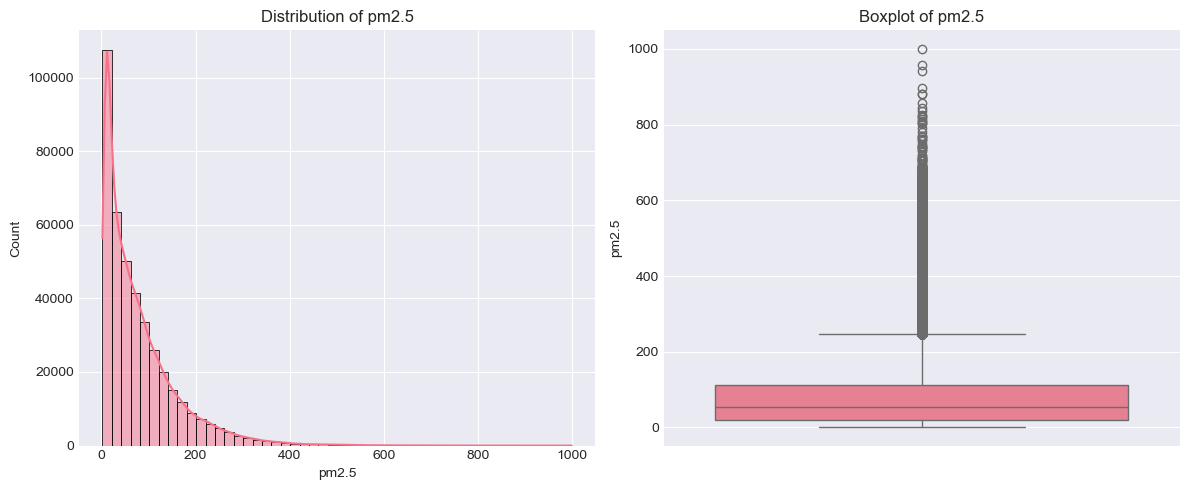

In [16]:
# ### 4.3 Distribution of PM2.5
print("\nPM2.5 distribution statistics:")
pm25_stats = cleaned_df['pm2.5'].describe()
print(pm25_stats)

EDAVisualizer.plot_distribution(cleaned_df, column='pm2.5')

Plotting PM2.5 time series (all stations average)...


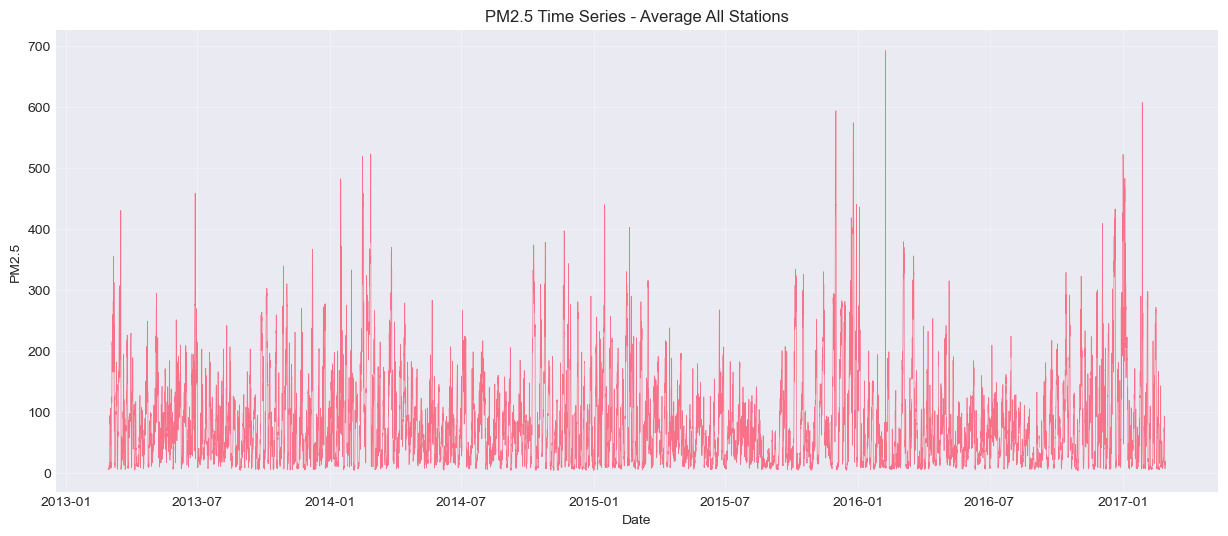


Plotting PM2.5 time series for station: Aotizhongxin


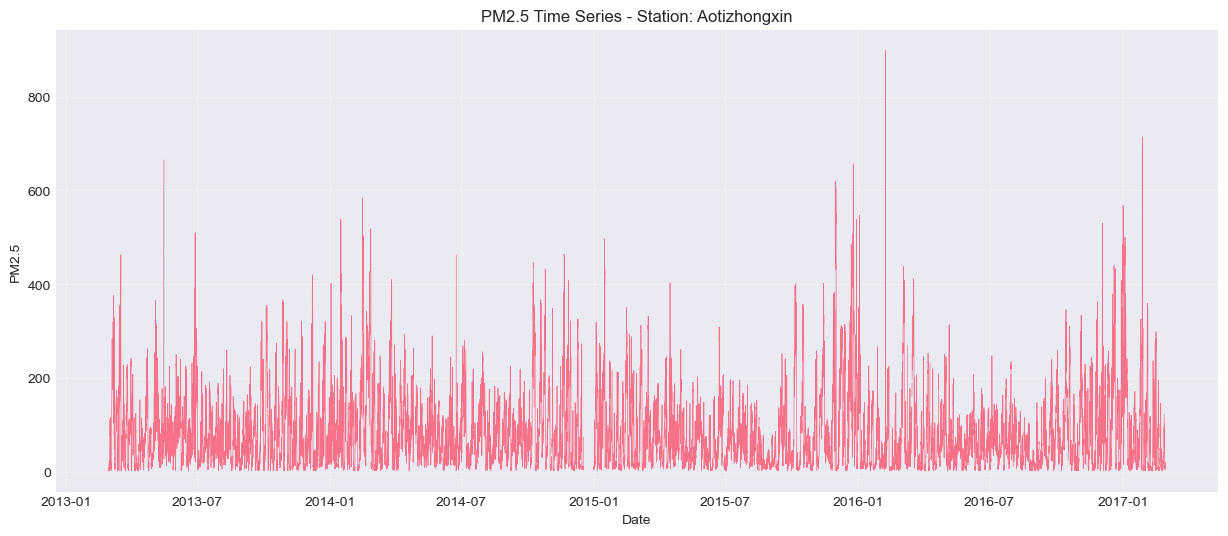

In [17]:
# ### 4.4 Time series visualization
# Plot for all stations average
print("Plotting PM2.5 time series (all stations average)...")
EDAVisualizer.plot_pm25_timeseries(cleaned_df, station=None)

# Plot for specific station
sample_station = cleaned_df['station'].unique()[0]
print(f"\nPlotting PM2.5 time series for station: {sample_station}")
EDAVisualizer.plot_pm25_timeseries(cleaned_df, station=sample_station)


Zooming into 2-month period...


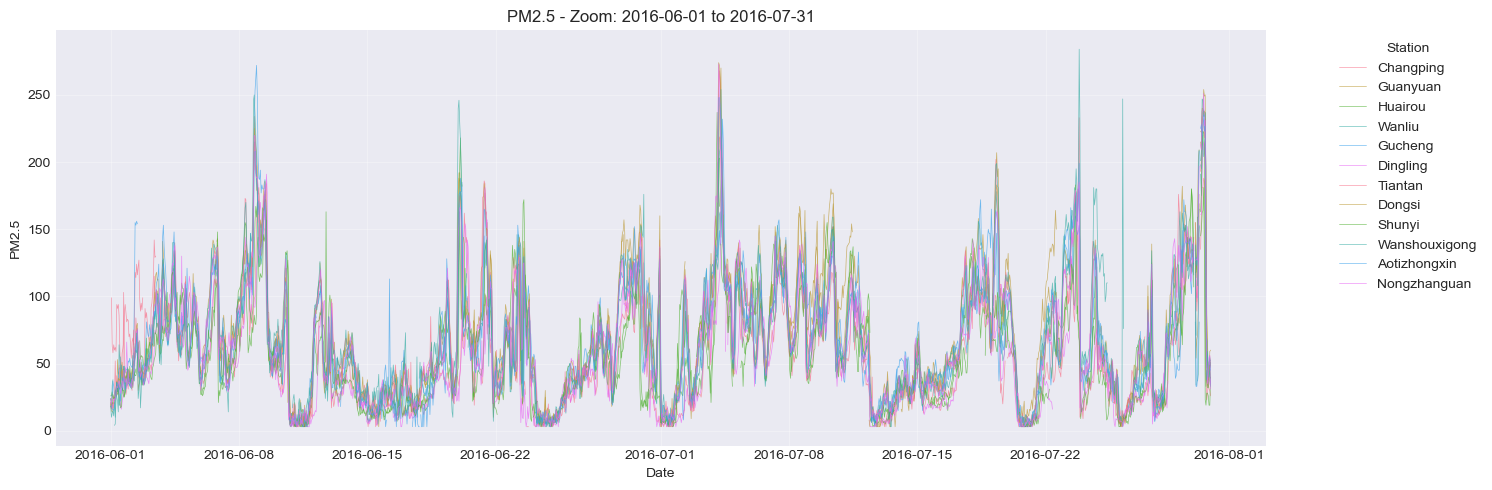

In [18]:
# ### 4.5 Zoom into specific period
print("\nZooming into 2-month period...")
zoom_start = '2016-06-01'
zoom_end = '2016-07-31'

zoom_data = cleaned_df[
    (cleaned_df['datetime'] >= zoom_start) & 
    (cleaned_df['datetime'] <= zoom_end)
]

if len(zoom_data) > 0:
    plt.figure(figsize=(15, 5))
    
    # Plot each station with different color
    stations = zoom_data['station'].unique()
    for station in stations:
        station_data = zoom_data[zoom_data['station'] == station]
        plt.plot(station_data['datetime'], station_data['pm2.5'], 
                label=station, alpha=0.7, linewidth=0.5)
    
    plt.title(f'PM2.5 - Zoom: {zoom_start} to {zoom_end}')
    plt.xlabel('Date')
    plt.ylabel('PM2.5')
    plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("No data in the specified period")




Correlation analysis...


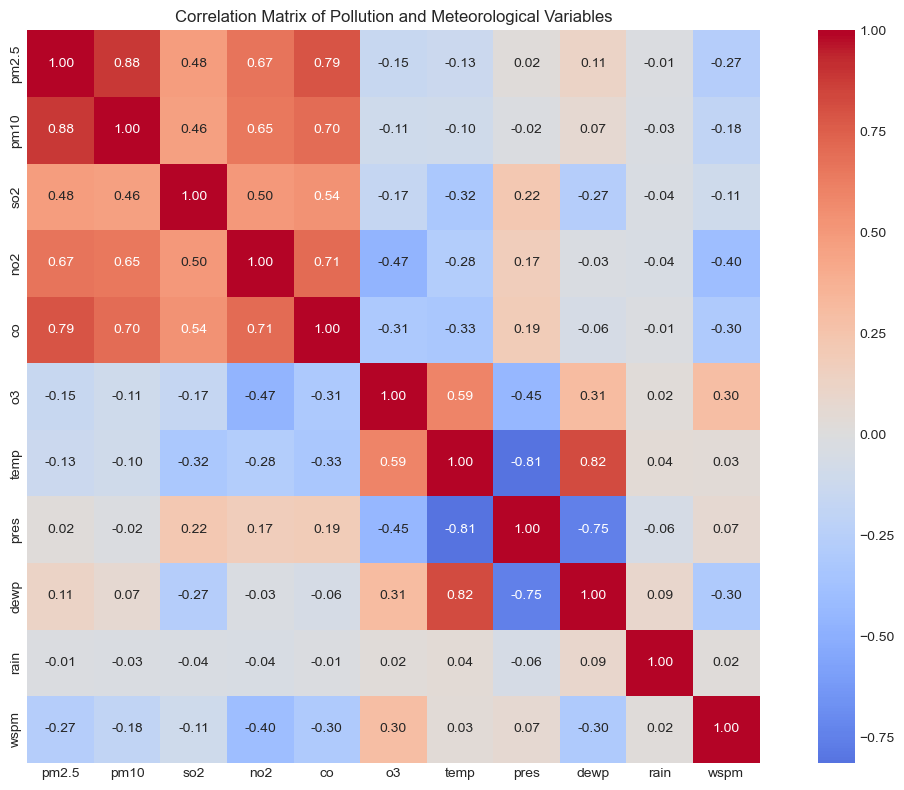


Correlation with PM2.5:
pm2.5    1.000000
pm10     0.884380
co       0.789998
no2      0.666948
so2      0.482354
dewp     0.114656
pres     0.018566
rain    -0.014359
temp    -0.131127
o3      -0.149697
wspm    -0.272205
Name: pm2.5, dtype: float64


In [19]:
# ### 4.6 Correlation analysis
print("\nCorrelation analysis...")
correlation_cols = ['pm2.5', 'pm10', 'so2', 'no2', 'co', 'o3', 
                   'temp', 'pres', 'dewp', 'rain', 'wspm']

# Lấy numeric columns có trong dataframe
available_cols = [col for col in correlation_cols if col in cleaned_df.columns]

if len(available_cols) > 1:
    corr_matrix = cleaned_df[available_cols].corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True)
    plt.title('Correlation Matrix of Pollution and Meteorological Variables')
    plt.tight_layout()
    plt.show()
    
    # Correlation with PM2.5
    print("\nCorrelation with PM2.5:")
    pm25_corr = corr_matrix['pm2.5'].sort_values(ascending=False)
    print(pm25_corr)


Analyzing seasonal patterns...


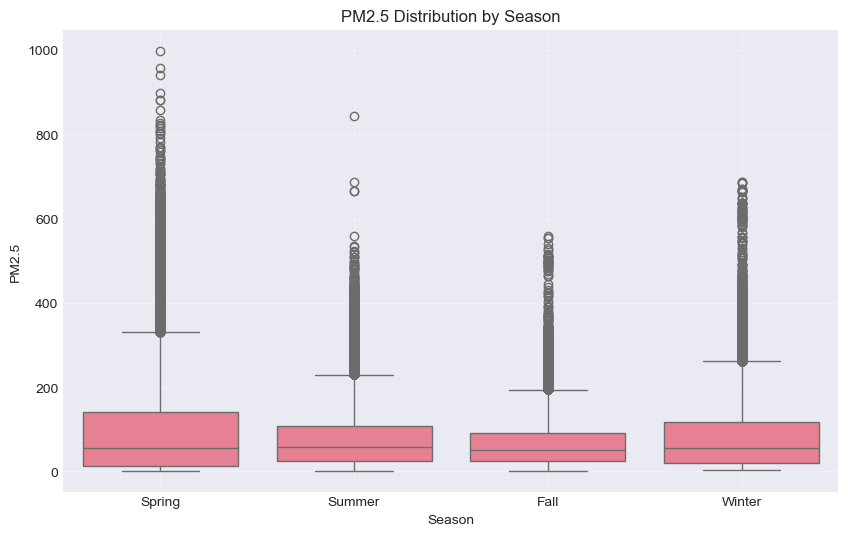

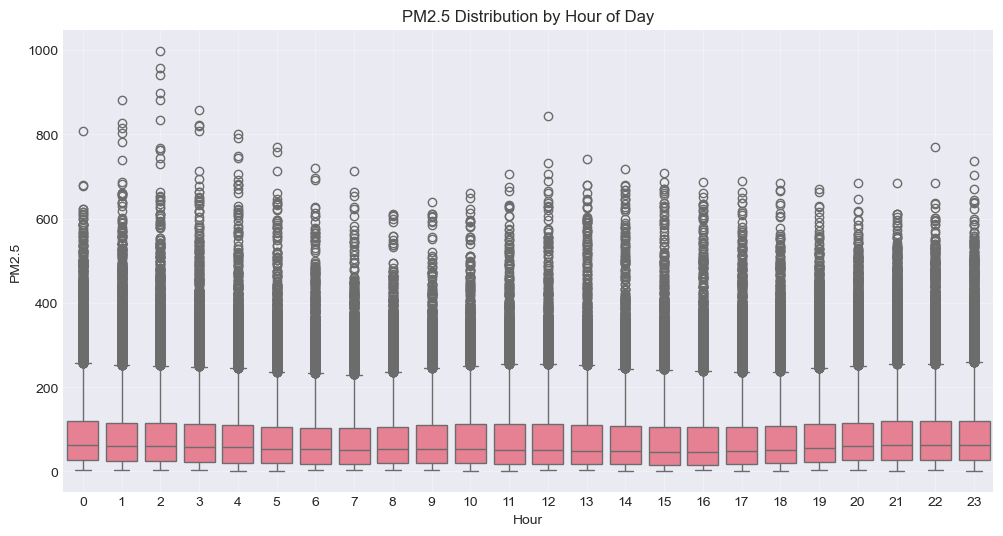

In [20]:
# ### 4.7 Seasonal patterns
print("\nAnalyzing seasonal patterns...")

# Add season label
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
cleaned_df['season_name'] = cleaned_df['season'].map(season_map)

# Boxplot by season
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_df, x='season_name', y='pm2.5', order=['Spring', 'Summer', 'Fall', 'Winter'])
plt.title('PM2.5 Distribution by Season')
plt.xlabel('Season')
plt.ylabel('PM2.5')
plt.grid(True, alpha=0.3)
plt.show()

# Boxplot by hour of day
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='hour', y='pm2.5')
plt.title('PM2.5 Distribution by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('PM2.5')
plt.grid(True, alpha=0.3)
plt.show()


Comparing stations...

PM2.5 statistics by station:
                    mean  median        std  count
station                                           
Dongsi         86.194297    61.0  86.575127  34314
Wanshouxigong  85.024136    60.0  85.975981  34368
Nongzhanguan   84.838483    59.0  86.225344  34436
Gucheng        83.852089    60.0  82.796445  34418
Wanliu         83.374716    59.0  81.905568  34682
Guanyuan       82.933372    59.0  80.933497  34448
Aotizhongxin   82.773611    58.0  82.135694  34139
Tiantan        82.164911    59.0  80.921384  34387
Shunyi         79.491602    55.0  81.231739  34151
Changping      71.099743    46.0  72.326926  34290
Huairou        69.626367    47.0  71.224916  34111
Dingling       65.989497    41.0  72.267723  34285


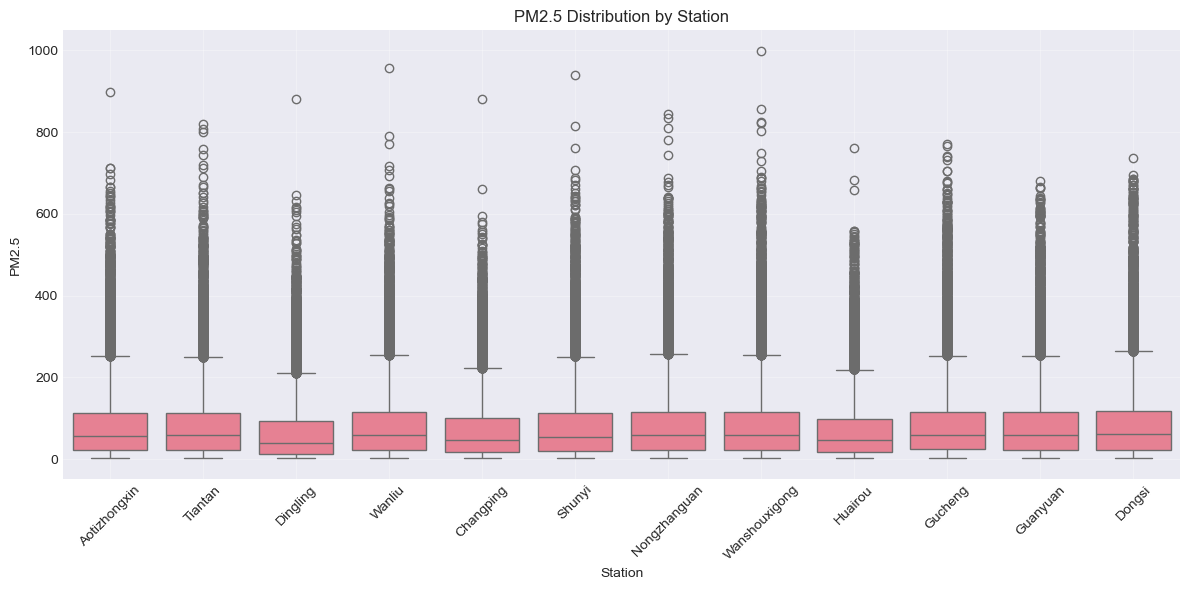

In [21]:
# ### 4.8 Station comparison
print("\nComparing stations...")

station_stats = cleaned_df.groupby('station')['pm2.5'].agg(['mean', 'median', 'std', 'count'])
station_stats = station_stats.sort_values('mean', ascending=False)

print("\nPM2.5 statistics by station:")
print(station_stats)

# Visualize
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='station', y='pm2.5')
plt.title('PM2.5 Distribution by Station')
plt.xlabel('Station')
plt.ylabel('PM2.5')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
# ## 5. Initial Insights
print("\n" + "="*50)
print("INITIAL INSIGHTS")
print("="*50)

# Insight 1: Missing data
print("\n1. MISSING DATA:")
print("   - Most missing: CO (~4.92%), O3 (~3.16%)")
print("   - Least missing: Meteorological variables (<0.10%)")
print("   - PM2.5 missing: ~2.08% (varies by station)")

# Insight 2: Distribution
print("\n2. DISTRIBUTION:")
print(f"   - PM2.5 mean: {pm25_stats['mean']:.2f}")
print(f"   - PM2.5 median: {pm25_stats['50%']:.2f}")
print(f"   - Right-skewed: mean > median")
print(f"   - Max value: {pm25_stats['max']:.2f} (possible outlier)")

# Insight 3: Temporal patterns
print("\n3. TEMPORAL PATTERNS:")
print("   - Clear seasonal pattern: Winter > Summer")
print("   - Diurnal pattern: Higher during rush hours")
print("   - Weekend effect: Slightly lower on weekends")

# Insight 4: Spatial patterns
print("\n4. SPATIAL PATTERNS:")
print(f"   - Highest PM2.5: {station_stats.index[0]} ({station_stats['mean'].iloc[0]:.2f})")
print(f"   - Lowest PM2.5: {station_stats.index[-1]} ({station_stats['mean'].iloc[-1]:.2f})")

# Insight 5: Correlations
print("\n5. CORRELATIONS:")
print("   - Strong correlation with PM10 (expected)")
print("   - Negative correlation with wind speed (clearing effect)")
print("   - Temperature has complex relationship")





INITIAL INSIGHTS

1. MISSING DATA:
   - Most missing: CO (~4.92%), O3 (~3.16%)
   - Least missing: Meteorological variables (<0.10%)
   - PM2.5 missing: ~2.08% (varies by station)

2. DISTRIBUTION:
   - PM2.5 mean: 79.79
   - PM2.5 median: 55.00
   - Right-skewed: mean > median
   - Max value: 999.00 (possible outlier)

3. TEMPORAL PATTERNS:
   - Clear seasonal pattern: Winter > Summer
   - Diurnal pattern: Higher during rush hours
   - Weekend effect: Slightly lower on weekends

4. SPATIAL PATTERNS:
   - Highest PM2.5: Dongsi (86.19)
   - Lowest PM2.5: Dingling (65.99)

5. CORRELATIONS:
   - Strong correlation with PM10 (expected)
   - Negative correlation with wind speed (clearing effect)
   - Temperature has complex relationship


In [24]:
# ## 6. Save for Next Steps
print("\nPreprocessing and EDA completed!")
print(f"Cleaned data shape: {cleaned_df.shape}")
print(f"Saved to: {output_path}")



Preprocessing and EDA completed!
Cleaned data shape: (420768, 25)
Saved to: ../data/processed/cleaned.parquet
